In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('data/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv('data/test.csv')

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Data Preprocessing

In [5]:
train_data_processed = train_data.drop(columns=['Name', 'PassengerId'])
test_data_processed = test_data.drop(columns=['Name', 'PassengerId'])

In [6]:
train_data_processed.shape

(891, 10)

In [7]:
test_data_processed.shape

(418, 9)

In [8]:
train_data_processed['Pclass'] = train_data_processed['Pclass'].astype(str)

In [9]:
test_data_processed['Pclass'] = test_data_processed['Pclass'].astype(str)

In [10]:
train_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


In [11]:
train_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


In [12]:
train_data_processed['Age'] = train_data_processed['Age'].fillna(train_data_processed['Age'].mean())

In [13]:
test_data_processed['Age'] = test_data_processed['Age'].fillna(train_data_processed['Age'].mean())

In [14]:
train_data_processed = train_data_processed.drop(columns=['Cabin'])
test_data_processed = test_data_processed.drop(columns=['Cabin'])

In [15]:
train_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 62.8+ KB


In [16]:
train_data_processed['Embarked'] = train_data_processed['Embarked'].fillna(train_data_processed['Embarked'].mode()[0])

In [17]:
test_data_processed['Embarked'] = test_data_processed['Embarked'].fillna(train_data_processed['Embarked'].mode()[0])

In [18]:
train_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 62.8+ KB


In [19]:
test_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null object
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 26.2+ KB


In [20]:
test_data_processed['Fare'] = test_data_processed['Fare'].fillna(train_data_processed['Fare'].mean())

In [21]:
test_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass      418 non-null object
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        418 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 26.2+ KB


In [22]:
train_data_processed = train_data_processed.drop(columns=['Ticket'])
test_data_processed = test_data_processed.drop(columns=['Ticket'])

### Data Transforming

In [23]:
y_train = train_data_processed['Survived']
# features = pd.concat([train_features, test_features]).reset_index(drop=True)

In [24]:
train_data_processed = train_data_processed.drop(columns=['Survived'])

In [25]:
features = pd.concat([train_data_processed, test_data_processed]).reset_index(drop=True)

In [26]:
features.shape

(1309, 7)

In [27]:
features['Family'] = features['SibSp'] + features['Parch']

In [28]:
features['HasFamily'] = features['Family'].apply(lambda x: 1 if x > 0 else 0)

In [29]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
Pclass       1309 non-null object
Sex          1309 non-null object
Age          1309 non-null float64
SibSp        1309 non-null int64
Parch        1309 non-null int64
Fare         1309 non-null float64
Embarked     1309 non-null object
Family       1309 non-null int64
HasFamily    1309 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 92.2+ KB


In [30]:
from scipy.stats import skew ,boxcox_normmax
from scipy.special import boxcox1p

In [31]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in features.columns:
    if features[i].dtype in numeric_dtypes:
        numerics2.append(i)
skew_features = features[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

for i in skew_index:
    features[i] = boxcox1p(features[i], boxcox_normmax(features[i] + 1))

In [32]:
final_features = pd.get_dummies(features).reset_index(drop=True)

In [33]:
final_features.shape

(1309, 14)

In [34]:
X_train = final_features.iloc[:len(y_train), :]
X_test = final_features.iloc[len(y_train):, :]

In [35]:
X_train

,Age,SibSp,Parch,Fare,Family,HasFamily,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.000000,0.585805,0.000000,1.973937,0.635300,1,0,0,1,0,1,0,0,1
1,38.000000,0.585805,0.000000,3.744371,0.635300,1,1,0,0,1,0,1,0,0
2,26.000000,0.000000,0.000000,2.042474,0.000000,0,0,0,1,1,0,0,0,1
3,35.000000,0.585805,0.000000,3.521986,0.635300,1,1,0,0,1,0,0,0,1
4,35.000000,0.000000,0.000000,2.054559,0.000000,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,0.000000,0.000000,2.428249,0.000000,0,0,1,0,0,1,0,0,1
887,19.000000,0.000000,0.000000,3.082864,0.000000,0,1,0,0,1,0,0,0,1
888,29.699118,0.585805,0.921646,2.890878,1.167596,1,0,0,1,1,0,0,0,1
889,26.000000,0.000000,0.000000,3.082864,0.000000,0,1,0,0,0,1,1,0,0


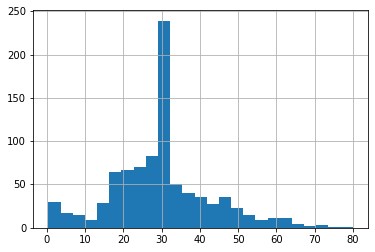

In [36]:
X_train['Age'].hist(bins=25)

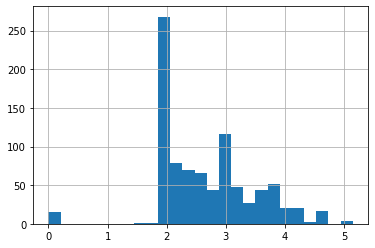

In [37]:
X_train['Fare'].hist(bins=25)

In [38]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [39]:
svc=make_pipeline(StandardScaler(),SVC(random_state=1))
r=[0.0001,0.001,0.1,1,10,50,100]
PSVM=[{'svc__C':r, 'svc__kernel':['linear']},
      {'svc__C':r, 'svc__gamma':r, 'svc__kernel':['rbf']}]
GSSVM=GridSearchCV(estimator=svc, param_grid=PSVM, scoring='accuracy', cv=2)
scores_svm=cross_val_score(GSSVM, X_train.astype(float), y_train,scoring='accuracy', cv=5)

In [40]:
np.mean(scores_svm)

0.8114913289549885

In [41]:
model=GSSVM.fit(X_train, y_train)

In [42]:
pred=model.predict(X_test)

In [43]:
output=pd.DataFrame({'PassengerId':test_data['PassengerId'],'Survived':pred})

In [44]:
output.to_csv('submission.csv', index=False)